In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_column',None)
import re

In [2]:
df=pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
def unique_val(data, dtype):
    return {i: list(data[i].unique()) for i in data.select_dtypes(dtype)}

In [7]:
unique_val(df, np.int64)

{'cylinders': [8, 4, 6, 3, 5],
 'weight': [3504,
  3693,
  3436,
  3433,
  3449,
  4341,
  4354,
  4312,
  4425,
  3850,
  3563,
  3609,
  3761,
  3086,
  2372,
  2833,
  2774,
  2587,
  2130,
  1835,
  2672,
  2430,
  2375,
  2234,
  2648,
  4615,
  4376,
  4382,
  4732,
  2264,
  2228,
  2046,
  2634,
  3439,
  3329,
  3302,
  3288,
  4209,
  4464,
  4154,
  4096,
  4955,
  4746,
  5140,
  2962,
  2408,
  3282,
  3139,
  2220,
  2123,
  2074,
  2065,
  1773,
  1613,
  1834,
  1955,
  2278,
  2126,
  2254,
  2226,
  4274,
  4385,
  4135,
  4129,
  3672,
  4633,
  4502,
  4456,
  4422,
  2330,
  3892,
  4098,
  4294,
  4077,
  2933,
  2511,
  2979,
  2189,
  2395,
  2288,
  2506,
  2164,
  2100,
  4100,
  3988,
  4042,
  3777,
  4952,
  4363,
  4237,
  4735,
  4951,
  3821,
  3121,
  3278,
  2945,
  3021,
  2904,
  1950,
  4997,
  4906,
  4654,
  4499,
  2789,
  2279,
  2401,
  2379,
  2124,
  2310,
  2472,
  2265,
  4082,
  4278,
  1867,
  2158,
  2582,
  2868,
  3399,
  2660,
  2807,

In [8]:
## cylinders, origin can be encoded
## cylinders - ordinal
## origin - norminal
## car name

In [9]:
df['horsepower']=pd.to_numeric(df['horsepower'], errors='coerce')

In [10]:
df['horsepower'].isnull().sum()

6

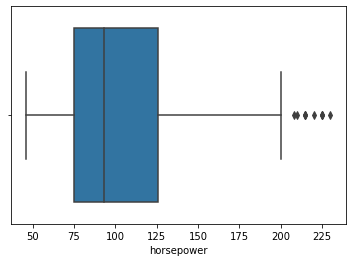

In [11]:
sb.boxplot(x='horsepower', data=df)

plt.show()

In [12]:
## There are outliers in the horsepower column so we fill them with median values

In [13]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [14]:
df['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [15]:
len(df['car name'].unique())

305

In [16]:
## The first name in the [car name] column is the name of the car, we can extract it from the column

In [17]:
df['car name']=df['car name'].apply(lambda x: re.search(r'^\w+', x).group(0))

In [18]:
df['car name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw', 'mercedes',
       'cadillac', 'vokswagen', 'triumph', 'nissan'], dtype=object)

In [19]:
df['car name'].value_counts()

ford          51
chevrolet     43
plymouth      31
dodge         28
amc           28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
honda         13
mercury       11
oldsmobile    10
mazda         10
peugeot        8
fiat           8
audi           7
chrysler       6
vw             6
volvo          6
renault        5
saab           4
opel           4
subaru         4
chevy          3
mercedes       3
cadillac       2
maxda          2
bmw            2
triumph        1
toyouta        1
chevroelt      1
nissan         1
vokswagen      1
capri          1
hi             1
Name: car name, dtype: int64

In [20]:
replacement={
    'vw':'volkswagen',
    'chevy':'chevrolet',
    'maxda':'mazda',
    'chevroelt':'chevrolet',
    'toyouta':'toyota',
    'vokswagen':'volkswagen'
}

In [21]:
df['car name']=df['car name'].replace(replacement)

In [22]:
df['car name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'capri', 'mercedes', 'cadillac', 'triumph', 'nissan'], dtype=object)

In [23]:
## Encode the values in the 'car name' column

In [24]:
def norminal_encode(data, col, title):
    dummies=pd.get_dummies(data[col], title)
    data=pd.concat([data, dummies], axis=1)
    data=data.drop(col, axis=1)
    
    return data

In [25]:
df=norminal_encode(df, 'car name', 'car')
df=norminal_encode(df, 'origin', 'origin')
df=norminal_encode(df, 'cylinders', 'cylinder')

In [26]:
df.head()

,mpg,displacement,horsepower,weight,acceleration,model year,car_amc,car_audi,car_bmw,car_buick,car_cadillac,car_capri,car_chevrolet,car_chrysler,car_datsun,car_dodge,car_fiat,car_ford,car_hi,car_honda,car_mazda,car_mercedes,car_mercury,car_nissan,car_oldsmobile,car_opel,car_peugeot,car_plymouth,car_pontiac,car_renault,car_saab,car_subaru,car_toyota,car_triumph,car_volkswagen,car_volvo,origin_1,origin_2,origin_3,cylinder_3,cylinder_4,cylinder_5,cylinder_6,cylinder_8
0,18.0,307.0,130.0,3504,12.0,70,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,15.0,350.0,165.0,3693,11.5,70,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,18.0,318.0,150.0,3436,11.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,16.0,304.0,150.0,3433,12.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,17.0,302.0,140.0,3449,10.5,70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
